### NAME: Tarun Dadlani
### CWID: 20010209
### Class: CS513B
### Midterm Q7

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [54]:
acc_scores = []
dataset = pd.read_csv('BP.csv')
dataset = dataset.replace("?", np.NaN)  # replace "?" with NaN
dataset["BP_Status"] = dataset["BP_Status"].astype('category')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4403 entries, 0 to 4402
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Somker     4403 non-null   object  
 1   Gender     4403 non-null   object  
 2   Age        4403 non-null   int64   
 3   Height     4403 non-null   float64 
 4   Weight     4403 non-null   int64   
 5   BP_Status  4403 non-null   category
dtypes: category(1), float64(1), int64(2), object(2)
memory usage: 176.5+ KB


In [55]:
# Split the data into training and testing sets
X = dataset.drop('BP_Status', axis=1)
y = dataset['BP_Status']

In [56]:
# converting somker and gender to encode to numeric values
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Somker', 'Gender'])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [57]:
le = LabelEncoder()
y = le.fit_transform(y)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [59]:
# Standardizing data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
for i in range(2,11):
    knn_5 = KNeighborsClassifier(n_neighbors=i)
    knn_5.fit(X_train, y_train)
    y_pred = knn_5.predict(X_test)
    print(f"For n_neighbors = {i}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f'\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
    acc_scores.append(accuracy_score(y_test, y_pred))

For n_neighbors = 2
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.79      0.64       662
           1       0.60      0.32      0.42       659

    accuracy                           0.56      1321
   macro avg       0.57      0.56      0.53      1321
weighted avg       0.57      0.56      0.53      1321


Confusion Matrix:
[[521 141]
 [445 214]]
Accuracy: 0.5563966691900075

For n_neighbors = 3
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.58      0.58       662
           1       0.58      0.58      0.58       659

    accuracy                           0.58      1321
   macro avg       0.58      0.58      0.58      1321
weighted avg       0.58      0.58      0.58      1321


Confusion Matrix:
[[381 281]
 [278 381]]
Accuracy: 0.5768357305071915

For n_neighbors = 4
Classification Report:
              precision    recall  f1-score   support

           0      

Text(0, 0.5, 'Accuracy Score')

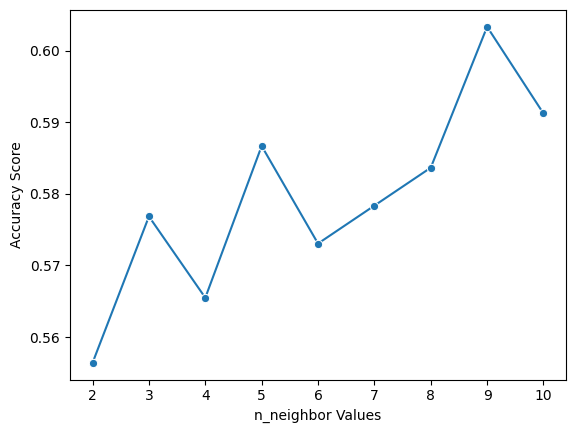

In [62]:
n_values=[i for i in range(2,11)]
sns.lineplot(x = n_values, y = acc_scores, marker = 'o')
plt.xlabel("n_neighbor Values")
plt.ylabel("Accuracy Score")